

# Linear Regreesion Algorithm

### Author: Beixian Gu



## Table Content
- Understanding of Alogorithm
- Simple Linear Regression
- Model Explaination
- Gradient Descent
- Application on Datasets

## Understanding of Algorithm


Linear regression models the relationship between a dependent variable (usually denoted as $y$) and one or more independent variables (usually denoted as $X$). It assumes a linear relationship between the input and output variables, and it is used to estimate the coefficients of the best-fitting line or hyperplane. The algorithm can be used for both simple linear regression (one input variable) and multiple linear regression (more than one input variable).
A Linear Regression model’s main aim is to find the best fit linear line and the optimal values of intercept and coefficients such that the error is minimized.
Error is the difference between the actual value and Predicted value and the goal is to reduce this difference.
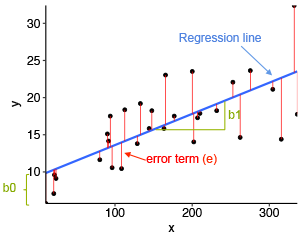


## Simple Linear Regression

For simple linear regression, the model can be represented by the following equation:

$$y = \beta_0 + \beta_1x + \epsilon$$

Where:
- $y$ is the dependent variable (target variable)
- $x$ is the independent variable (input feature)
- $\beta_0$ is the intercept (the value of $y$ when $x=0$)
- $\beta_1$ is the slope (the change in $y$ for a unit change in $x$)
- $\epsilon$ is the error term (difference between the predicted and actual values)

For multiple linear regression, the equation is:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$$

Where:
- $n$ is the number of input features
- $x_i$ is the $i^{th}$ input feature
- $\beta_i$ is the coefficient of the $i^{th}$ input feature


## Model Explanation

The goal of linear regression is to find the best-fitting line that minimizes the sum of the squared errors between the predicted values and the actual values. This is achieved by minimizing the following cost function:

$$J(\beta) = \frac{1}{2m} \sum_{i=1}^m (h_{\beta}(x^{(i)}) - y^{(i)})^2$$

Where:
- $m$ is the number of training examples
- $x^{(i)}$ is the $i^{th}$ input example
- $y^{(i)}$ is the actual value of the target variable for the $i^{th}$ example
- $h_{\beta}(x)$ is the hypothesis function, representing the predicted value of $y$ given the input $x$ and the current values of the coefficients $\beta$

The coefficients $\beta$ can be estimated using various optimization algorithms, such as gradient descent or the normal equation.

Linear regression has various applications, including predicting housing prices, sales forecasting, and estimating the relationship between different variables in various domains like finance, healthcare, and marketing.


## Gradient Descent
Gradient descent is an optimization algorithm used to find the minimum of a function. In the context of linear regression, we use gradient descent to minimize the cost function, which represents the difference between the predicted values and the actual values. By iteratively updating the model parameters (intercept and coefficients), we can minimize the cost function and find the best-fitting line for the given data.


### Description of Gradient Descent

The gradient descent algorithm starts with an initial set of parameters and computes the gradient (partial derivatives) of the cost function with respect to these parameters. It then updates the parameters by moving in the opposite direction of the gradient, aiming to find the minimum of the cost function.

The general update equation for gradient descent is:

$$
\theta_i := \theta_i - \alpha * \frac{\partial J(\theta)}{\partial \theta_i}
$$

where:

- $\theta_i$ represents the model parameters (weights and biases).
- $\alpha$ is the learning rate, which controls the step size of each update.
- $J(\theta)$ is the cost function.
- $\frac{\partial J(\theta)}{\partial \theta_i}$ is the partial derivative of the cost function with respect to the $i$-th parameter.

The learning rate, $\alpha$, is an important hyperparameter in the gradient descent algorithm. If the learning rate is too small, the algorithm will converge slowly, requiring many iterations to reach the optimal solution. If the learning rate is too large, the algorithm may overshoot the optimal solution and fail to converge.

There are several variants of gradient descent, such as batch gradient descent, stochastic gradient descent, and mini-batch gradient descent. These variants differ in how they update the model parameters based on the gradients, but the core concept remains the same.


## Application on Datasets
- Fish data
- House price data


### Fish
This application separates the features and target variable, splits the data into training and testing sets, trains a linear regression model, makes predictions, and evaluates the model using mean squared error(MSE) and $R^2$ score.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read the data from the CSV file
data = pd.read_csv('fish.csv')

# Define the feature matrix (X) and the target vector (y)
X = data.drop(columns=['Species', 'Weight'])
y = data['Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 16763.89
R^2 Score: 0.88


In [5]:
import matplotlib.pyplot as plt

# Take a sample of the test dataset
comparison_data = X_test.copy()
comparison_data['Actual_Weight'] = y_test
comparison_data['Predicted_Weight'] = y_pred

# Display the table
print(comparison_data.head(10))


     Length1  Length2  Length3   Height   Width  Actual_Weight  \
78      16.8     18.7     19.4   5.1992  3.1234           78.0   
155     11.7     12.4     13.5   2.4300  1.2690           13.4   
128     30.0     32.3     34.8   5.5680  3.3756          200.0   
55      23.6     26.0     28.7   8.3804  4.2476          270.0   
94      21.0     23.0     24.5   5.2185  3.6260          150.0   
29      33.5     37.0     42.6  18.9570  6.6030         1000.0   
147     10.1     10.6     11.6   1.7284  1.1484            7.0   
51      23.6     25.2     27.9   7.0866  3.9060          180.0   
98      22.6     24.6     26.2   6.7334  4.1658          188.0   
141     52.0     56.0     59.7  10.6863  6.9849         1250.0   

     Predicted_Weight  
78          77.685633  
155       -159.124606  
128        385.167355  
55         300.261194  
94         179.410232  
29         775.667262  
147       -214.434155  
51         274.909638  
98         268.445110  
141       1116.011532  


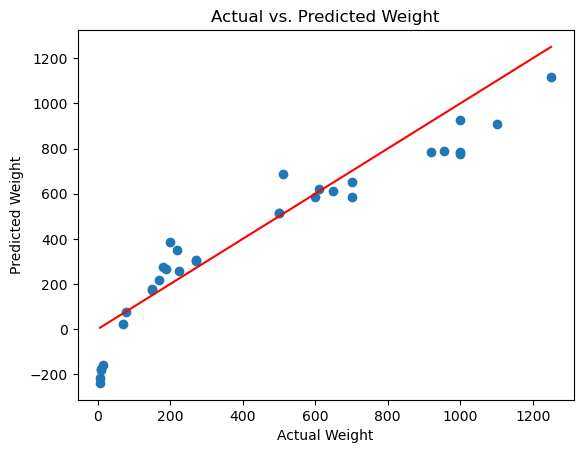

In [6]:
plt.scatter(comparison_data['Actual_Weight'], comparison_data['Predicted_Weight'])
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs. Predicted Weight')

# Plot the ideal 1:1 line
plt.plot([min(comparison_data['Actual_Weight']), max(comparison_data['Actual_Weight'])], [min(comparison_data['Actual_Weight']), max(comparison_data['Actual_Weight'])], color='red')

plt.show()


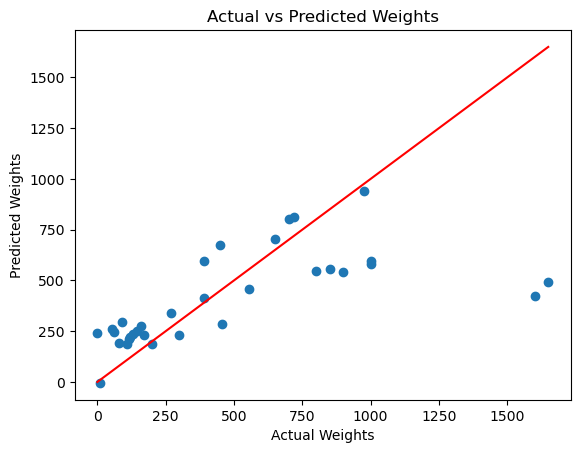

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("fish.csv")

# Assign the data to the dependent and independent variables
X = data["Height"].values.reshape(-1, 1)
y = data["Weight"].values

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling (normalization)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Gradient Descent implementation
def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    
    for i in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * alpha * (X.T.dot((prediction - y)))
        theta_history[i, :] = theta.T
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history, theta_history

# Add a column of ones for the intercept term
X_b = np.c_[np.ones((len(X_train), 1)), X_train]

# Set hyperparameters
alpha = 0.1
iterations = 1000

# Initialize theta (intercept and coefficient) to zeros
theta = np.zeros(2)

# Run gradient descent
theta, cost_history, theta_history = gradient_descent(X_b, y_train, theta, alpha, iterations)

# Predict the weights using the test dataset
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]
y_pred = np.dot(X_test_b, theta)

# Visualize the actual vs predicted weights
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Weights")
plt.ylabel("Predicted Weights")
plt.title("Actual vs Predicted Weights")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


### House Price Prediction

This application shows both the actual house prices (y) and the predicted house prices (pre_y) as a function of the feature values.

Mean squared error: 99786223089.67572


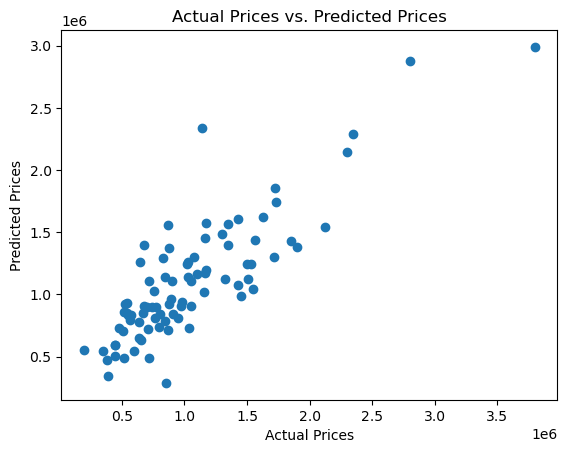

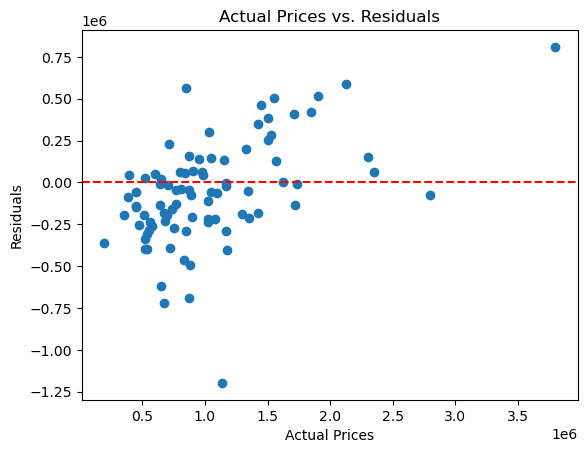

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the data from the CSV file
data = pd.read_csv("house price.csv")

# Preprocess the data
data.dropna(inplace=True)


# Define the features (X) and target (y)
X = data.drop("price", axis=1)
y = data["price"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean squared error:", mse)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Actual Prices vs. Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()



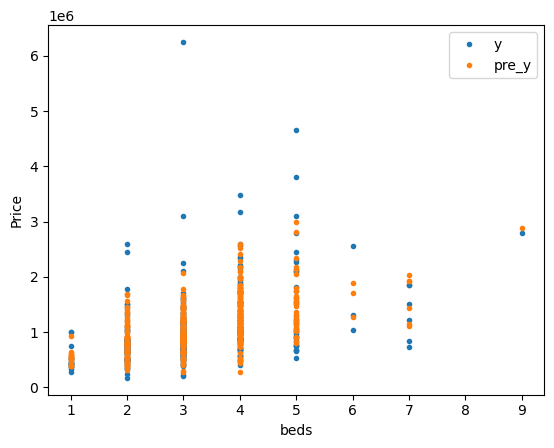

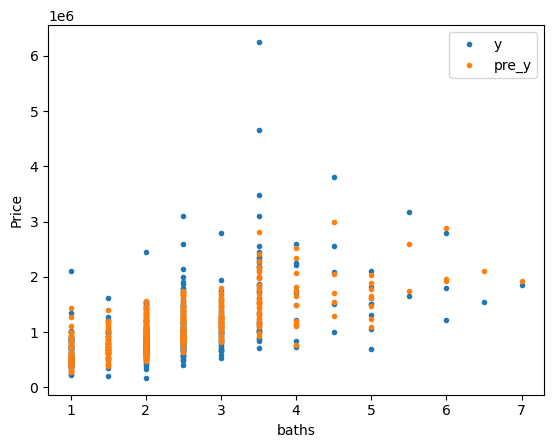

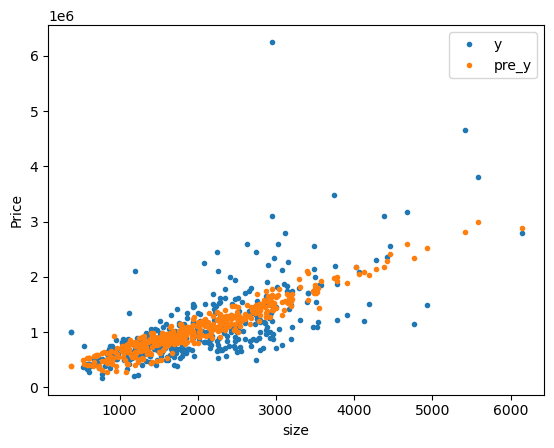

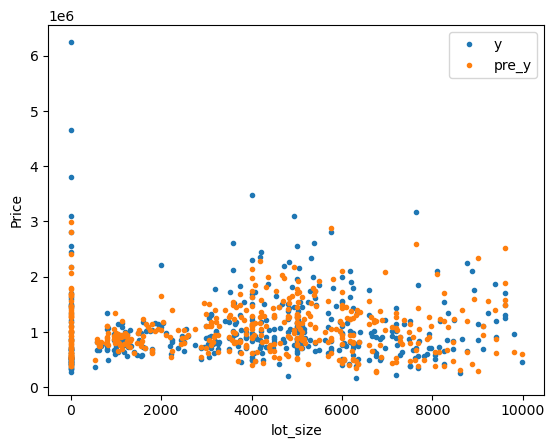

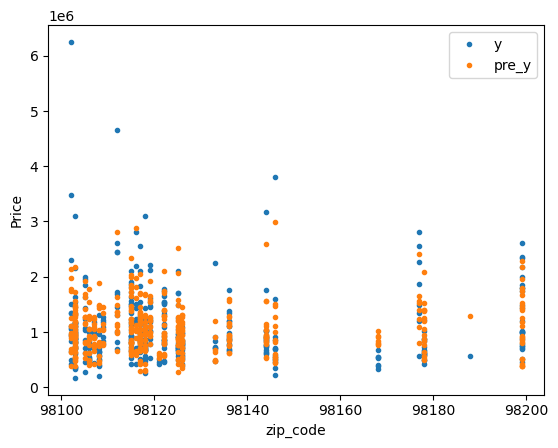

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the data from the CSV file
data = pd.read_csv("House price.csv")

# Preprocess the data
data.dropna(inplace=True)


# Define the features (X) and target (y)
X = data.drop("price", axis=1)
y = data["price"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the entire dataset
pre_y = model.predict(X)

# Visualizing the datasets
for feature_name in X.columns:
    plt.plot(X[feature_name], y, '.')
    plt.plot(X[feature_name], pre_y, '.')
    plt.legend(['y', 'pre_y'])
    plt.xlabel(feature_name)
    plt.ylabel('Price')
    plt.show()
